In [2]:
import io
import sys
from datetime import datetime
from Chain.Manager import Manager
import random, numpy
import Chain.Consensus.BigFoot.BigFoot as BigFoot
import Chain.Consensus.PBFT.PBFT as PBFT
from Chain.Metrics import SimulationState, Metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Chain.Parameters import Parameters
import Chain.tools as tools
import seaborn as sns
import sys


In [3]:

# Set the seed for random number generation
seed = 5
random.seed(seed)
np.random.seed(seed)

def run1(Node=10, Validator=0.1, Protocol='BigFoot',type="broadcast", beta=0.5,faulty_nodes=0,num_byzantine=0, runtime=300):
    """
    Runs the simulation with the given parameters.

    Parameters:
    Node (int): The number of nodes in the simulation.
    Validator (float): The probability of a node being a validator.
    Protocol (str): The consensus protocol to use ('BigFoot' or 'PBFT').
    Runtime (int): The runtime of the simulation in seconds.

    Returns:
    None
    """

    # Create a Manager object and set up the simulation
    manager = Manager()
    tools.set_env_vars_from_config()
    Parameters.load_params_from_config()
    # Use the modify method to set the parameters
    manager.modify('Nn', Node)
    manager.modify('alpha', Validator)
    manager.modify('init_CP', Protocol)
    manager.modify('beta', beta)
    manager.modify('type', type)
    manager.modify('simTime', runtime)
    manager.modify('crash_probs', faulty_nodes)
    manager.modify('byzantine_nodes', num_byzantine)
    manager.set_up()


    # Start the simulation and measure the runtime
    t = datetime.now()
    print("Simulation started...")
    manager.run()
    runtime = datetime.now() - t
    print("Simulation finished.")
    # Open a text file for writing the report

    SimulationState.store_state(manager.sim)
    Metrics.measure_all(SimulationState.blockchain_state)

    # Redirect stdout to a string buffer, print the metrics, and then reset stdout
    old_stdout = sys.stdout
    sys.stdout = buffer = io.StringIO()

    sys.stdout = old_stdout
        # Get the metrics results
    metrics_result = Metrics.metrics_result()
    Metrics.print_metrics(SimulationState.blockchain_state)
    # Add the parameters to the metrics result dictionary
    metrics_result.update({
        "Node": Node,
        "Validator": Validator,
        "Protocol": Protocol,
        "Type": type1,
        "Beta": beta,
        "Faulty Nodes": faulty_nodes,
        "Num Byzantine": num_byzantine
    })

    return metrics_result

with open('metrics1.txt', 'w') as f:
    sys.stdout = f  # Redirect stdout to the file
    time=0;   
    # Run the simulation with different parameters and collect the results
    results = []
    for faulty_nodes1  in [0,1,2]:
                number_byzantine1=faulty_nodes1
                for type1 in ["broadcast","gossip"]:
                    for Node1 in range(12,36,4):
                        for Validator1 in [1]:
                            for Protocol1 in ['PBFT', 'BigFoot']:
                                for Runtime1 in [600]:
                                    time=time+1
                                    f.write(f"time={time}\n")
                                    f.write(f"Running simulation with Node={Node1}, Validator={Validator1}, Protocol={Protocol1}, Runtime={Runtime1}, type={type1}, beta=0.2, faulty_nodes={faulty_nodes1}, num_byzantine={number_byzantine1}\n")
                                    
                                    f.flush()  # Flush the buffer
                                    result = run1(Node=Node1, Validator=Validator1, Protocol=Protocol1,type=type1, beta=0.4,faulty_nodes=faulty_nodes1,num_byzantine=number_byzantine1,runtime=Runtime1)
                                    results.append(result)
                                    
    sys.stdout = sys.__stdout__  # Reset stdout to its original value
# Convert the results to a DataFrame with appropriate columns
df = pd.DataFrame(results)

# Make sure to include all parameters and metrics in the DataFrame
expected_columns = ['Node', 'Validator', 'Protocol', 'Type', 'Beta', 'Faulty Nodes', 'Num Byzantine', 
                    'Average Latency', 'Latency Variance', 'Average Throughput', 'Throughput Variance',
                    'Average CP Messages', 'CP Messages Variance']  # Added new metrics
assert all(column in df.columns for column in expected_columns), "DataFrame is missing expected columns"

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
filename = f'filename_{timestamp}.xlsx'

df.to_excel(filename, index=False)
def plot_simulation_results(df):
    # Parameters for the x-axis
    x_params = ['Node', 'Validator', 'Protocol', 'Faulty Nodes', 'Type']  # Corrected column names
    # Metrics to plot on the y-axis
    y_metrics = ['Average Latency', 'Average Throughput', 'Average CP Messages']  # Added new metric
    
    # Set the style of matplotlib to emulate ggsci style
    plt.style.use('ggplot')  # 'ggplot' style has a good scientific look
    sns.set_palette("colorblind")  # Color palette that is colorblind accessible

    # Create subplots
    fig, axs = plt.subplots(len(y_metrics), len(x_params), figsize=(20, 10))

    for i, metric in enumerate(y_metrics):
        for j, param in enumerate(x_params):
            sns.barplot(data=df, x=param, y=metric, ax=axs[i, j], capsize=.05)
            axs[i, j].set_title(f'{metric} over different {param}')
            axs[i, j].set_xlabel(param)
            axs[i, j].set_ylabel(metric)
            for item in axs[i, j].get_xticklabels():
                item.set_rotation(45)  # Rotate x labels for better readability

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Call the function to plot the results
plot_simulation_results(df)


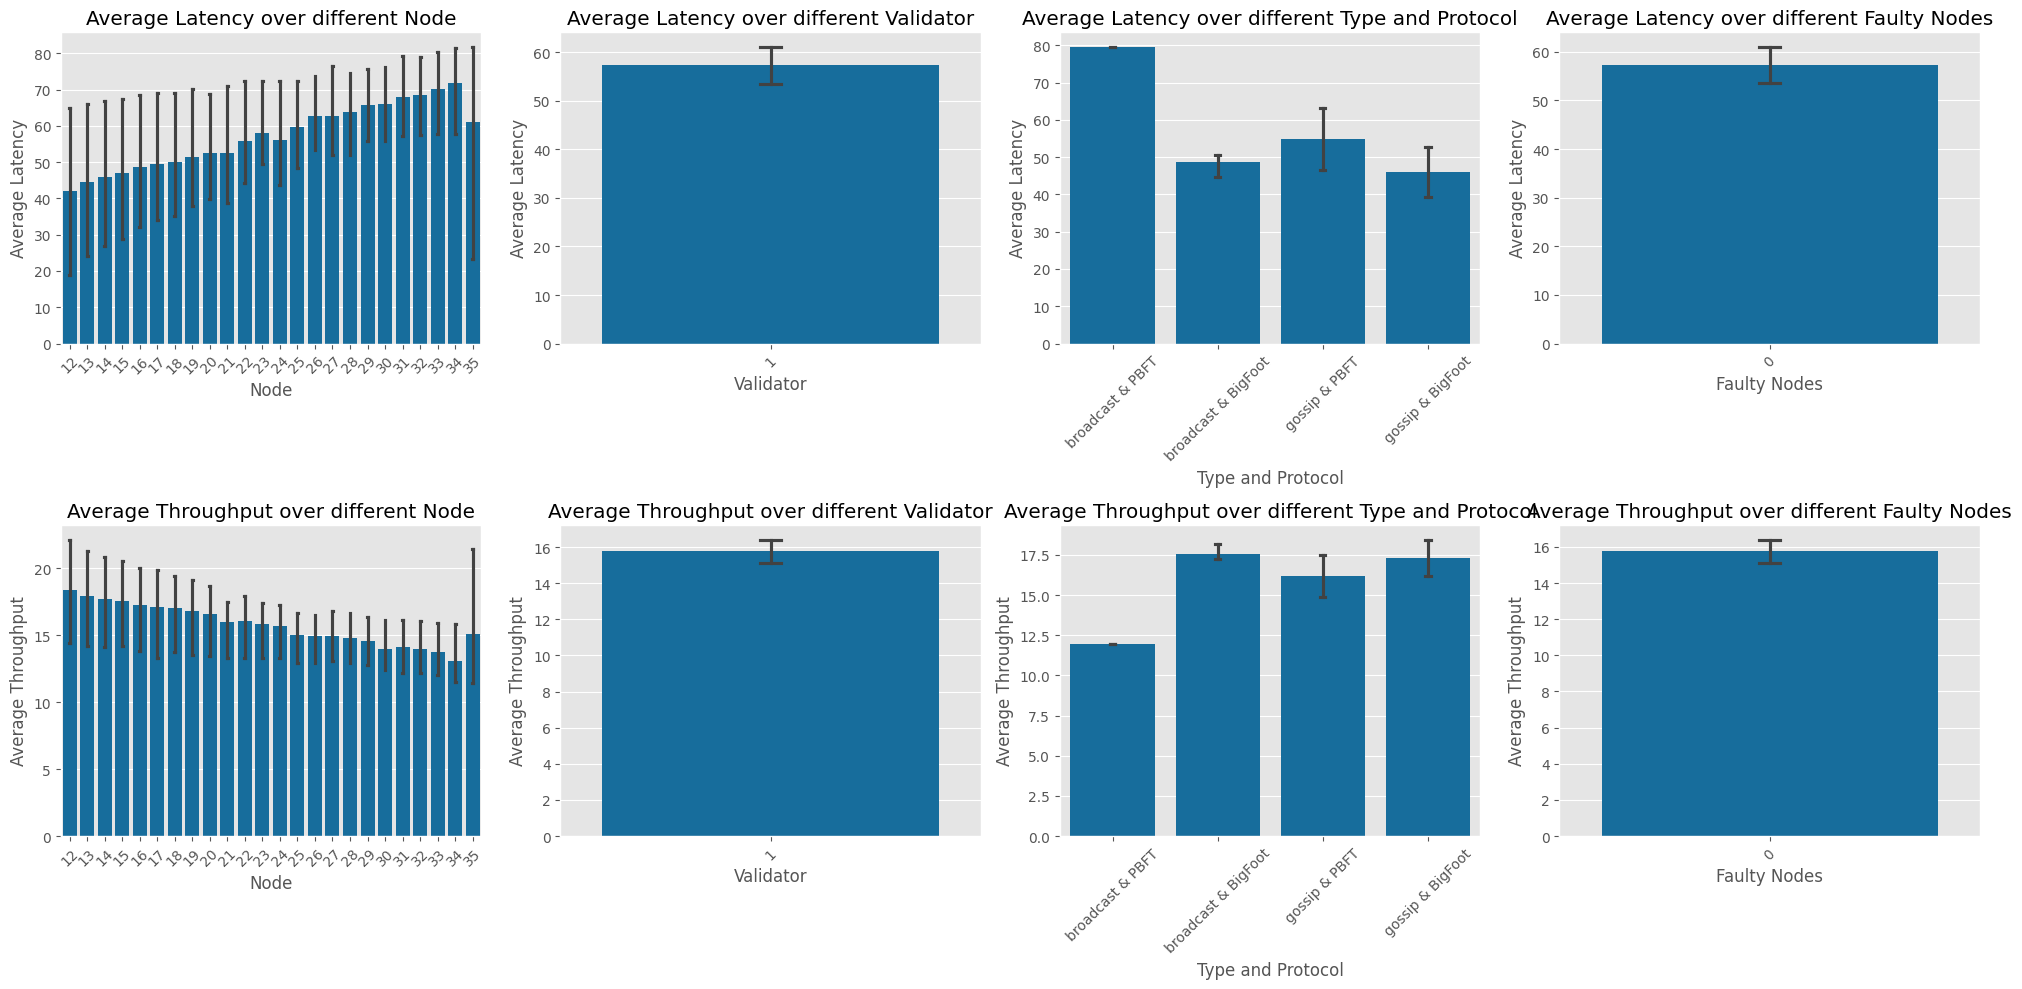

In [3]:
# Create a new column that combines the 'Type' and 'Protocol' columns
df['Type and Protocol'] = df['Type'] + ' & ' + df['Protocol']

def plot_simulation_results2(df):
    # Parameters for the x-axis
    x_params = ['Node', 'Validator', 'Type and Protocol', 'Faulty Nodes']  # Use the new column here
    # Metrics to plot on the y-axis
    y_metrics = ['Average Latency', 'Average Throughput']
    
    # Set the style of matplotlib to emulate ggsci style
    plt.style.use('ggplot')  # 'ggplot' style has a good scientific look
    sns.set_palette("colorblind")  # Color palette that is colorblind accessible

    # Create subplots
    fig, axs = plt.subplots(len(y_metrics), len(x_params), figsize=(20, 10))

    for i, metric in enumerate(y_metrics):
        for j, param in enumerate(x_params):
            sns.barplot(data=df, x=param, y=metric, ax=axs[i, j], capsize=.05)
            axs[i, j].set_title(f'{metric} over different {param}')
            axs[i, j].set_xlabel(param)
            axs[i, j].set_ylabel(metric)
            for item in axs[i, j].get_xticklabels():
                item.set_rotation(45)  # Rotate x labels for better readability

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Call the function to plot the results
plot_simulation_results2(df)

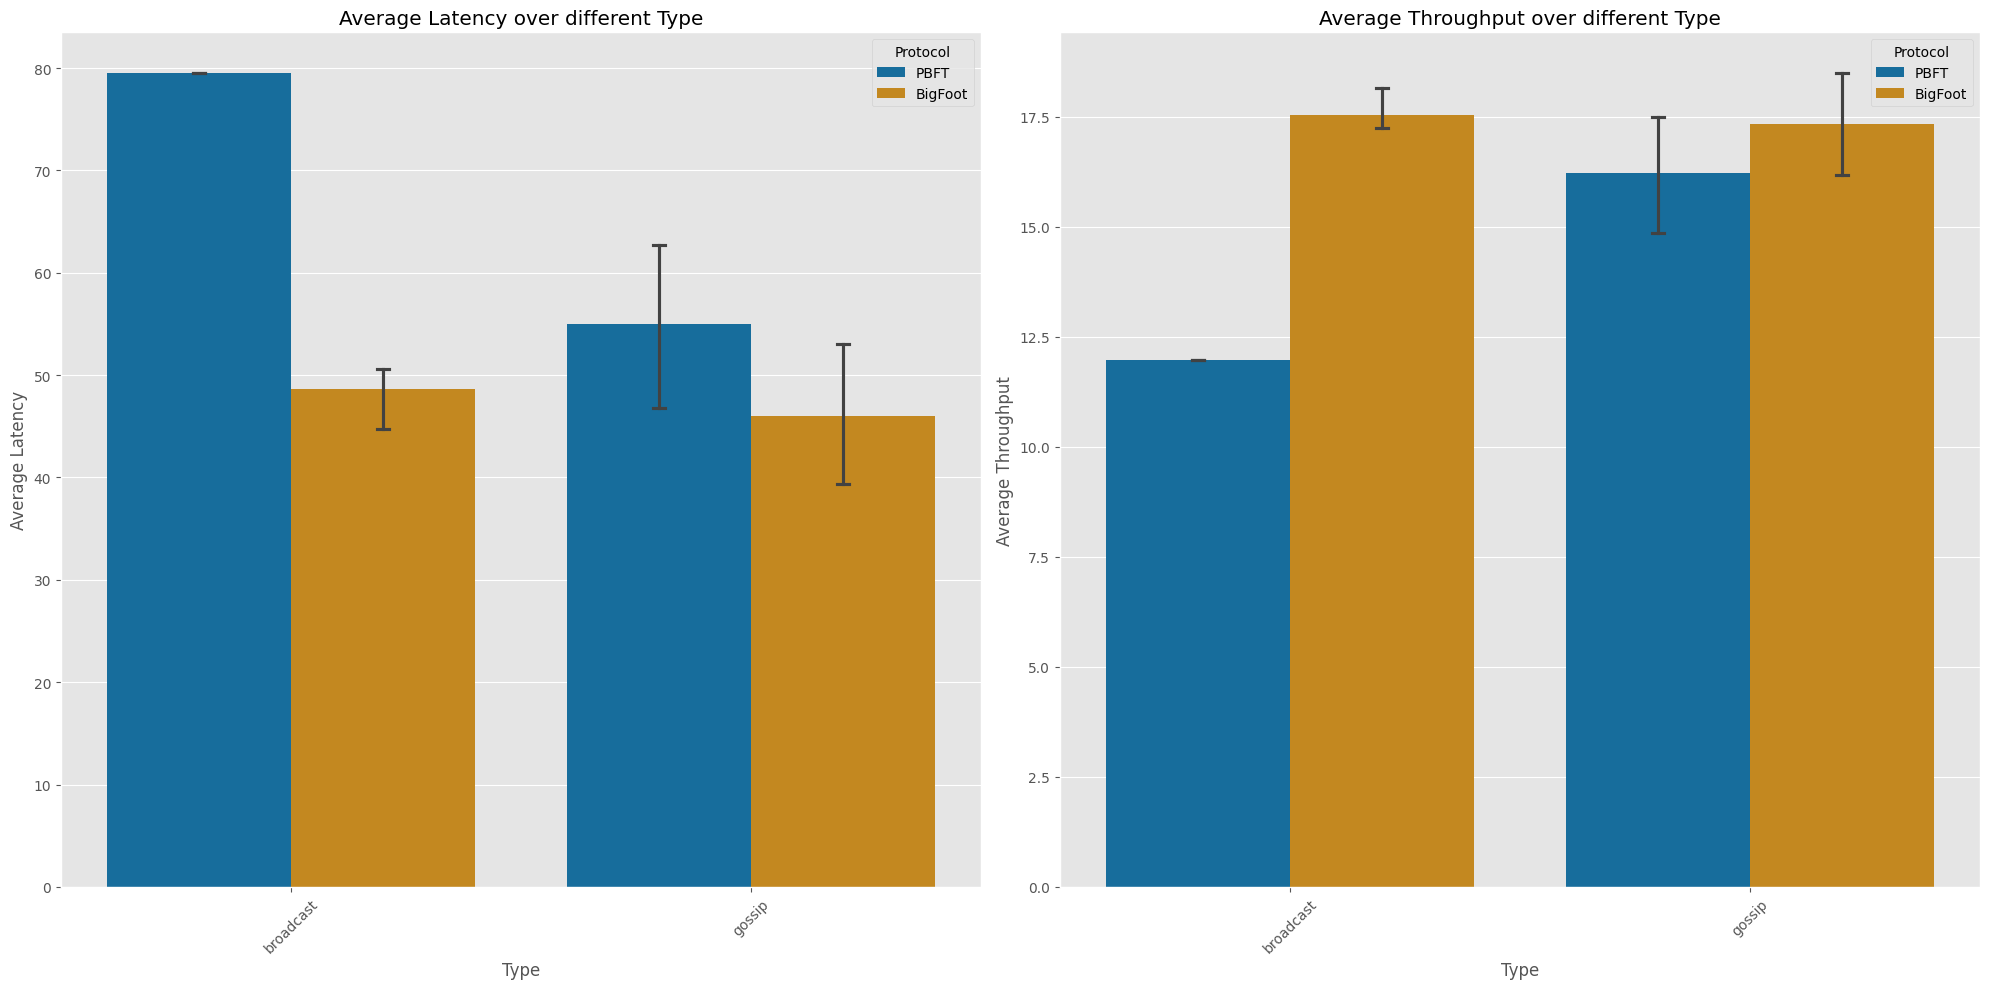

In [4]:
def plot_simulation_results3(df):
    # Parameters for the x-axis
    x_param = 'Type'
    # Metrics to plot on the y-axis
    y_metrics = ['Average Latency', 'Average Throughput']
    # Parameter for the legend
    legend_param = 'Protocol'
    
    # Set the style of matplotlib to emulate ggsci style
    plt.style.use('ggplot')  # 'ggplot' style has a good scientific look
    sns.set_palette("colorblind")  # Color palette that is colorblind accessible

    # Create subplots
    fig, axs = plt.subplots(1, len(y_metrics), figsize=(20, 10))

    for i, metric in enumerate(y_metrics):
        sns.barplot(data=df, x=x_param, y=metric, hue=legend_param, ax=axs[i], capsize=.05)
        axs[i].set_title(f'{metric} over different {x_param}')
        axs[i].set_xlabel(x_param)
        axs[i].set_ylabel(metric)
        for item in axs[i].get_xticklabels():
            item.set_rotation(45)  # Rotate x labels for better readability

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Call the function to plot the results
plot_simulation_results3(df)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_simulation_results(df):
    # Define the aesthetics for the plots to make them look more academic
    sns.set(style="whitegrid", palette="muted")

    # Create a lineplot for Throughput
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Node', y='Average Throughput', hue='Protocol', style='Faulty Nodes', markers=True, dashes=False, data=df)
    plt.title('Throughput vs. Number of Nodes')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Throughput (messages/s)')
    plt.legend(title='Protocol and Faulty Nodes')
    plt.tight_layout()
    plt.show()

    # Create a lineplot for Latency
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Node', y='Average Latency', hue='Protocol', style='Faulty Nodes', markers=True, dashes=False, data=df)
    plt.title('Latency vs. Number of Nodes')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Latency (ms)')
    plt.legend(title='Protocol and Faulty Nodes')
    plt.tight_layout()
    plt.show()

# Assuming `df` is your DataFrame and it contains the necessary columns
plot_simulation_results(df)


NameError: name 'df' is not defined